## Check if BCGs for miscentered clusters are members of the halo matched redM cluster. 

**Description**
Compares the BCGs in the miscentered clusters with the redM member catalog to see fraction of miscentered BCGs that are members of the same cluster. If they do not belong to the same cluster then the BCG is a line of sight projection. 

**Dataset**:
**redM_halos_fullmatchingparams_v1.2_redMv1.6.data**

Latest version of redM-halo matching using v1.6 of Buzzard and v1.2 of halo-matching algo. 

MEM_MATCH_ID: The redMaPPer ID identified by v1.2 of my matching scheme. 

GALAXY_ID: ID of the BCG Galaxy. 

**Buzzard-0_1.6_y3_run_redmapper_v6.4.20_lgt20_vl02_catalog_members.fit**

Contains member galaxies of the redMaPPer catalog.






In [31]:
import numpy as np
import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
import pickle
plot_pretty()

# setup notebook for inline figures
%matplotlib inline

from tools.setup.setup import data_home_dir, home_dir, bigdata_home_dir
import astropy.io.fits as fits

datadir = data_home_dir()
homedir = home_dir()
bigdatadir = bigdata_home_dir()

## Import the redM matched BCG/halo catalog

In [32]:
#Miscentering cut
import pickle

redM_halos = homedir + 'output/buzzard/redM_halos_noshape_v1.4_redMv1.6.data'

infile = open(redM_halos,'rb')
redM_halos = pickle.load(infile)
infile.close()

redM_halos = redM_halos.view(np.recarray)
print redM_halos.dtype
print len(redM_halos)

(numpy.record, [('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('HALOID', '>i8'), ('DESCID', '>i8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8'), ('matching_ID', '<i8'), ('MEM_MATCH_ID', '<i8'), ('LAMBDA_CHISQ', '<f8'), ('RA_REDM', '<f8'), ('DEC_REDM', '<f8'), ('centered_flag', '<i8'), ('ID_CENT', '<i8'), ('BCG_ID', '<i8')])
23658


## Import redM member catalog

In [33]:
redM_dir = bigdatadir + 'Buzzard_Sims/v1.6/buzzard_halo/redM/buzzard-0_1.6_y3_run_redmapper_v6.4.20_lgt5_vl02_catalog_members.fit'
redM_list = fits.open(redM_dir)
redM_members = redM_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in redM_data are: \n"
print redM_members.names

#Converting FITS files into record array
redM_members = np.array(redM_members, dtype=redM_members.dtype)
redM_members = redM_members.view(np.recarray)

print "\n Number of galaxies is", len(redM_members.ID)

Names of columns in redM_data are: 

['MEM_MATCH_ID', 'Z', 'RA', 'DEC', 'R', 'P', 'PFREE', 'THETA_I', 'THETA_R', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG_FIT', 'REFMAG_FIT_E', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED2', 'ZRED2_E', 'CHISQ', 'EBV', 'ZSPEC', 'ID']

 Number of galaxies is 6418974


## Check for centering fraction with different richness cuts. 
The richness cuts are $\lambda > 40$, $\lambda > 60$, $\lambda > 80$.

In [50]:
#Apply lambda cut
dummy = np.where(redM_halos.LAMBDA_CHISQ >= 80)
redM_halos = redM_halos[dummy]
print  "After richness cut number of redM halos is ", len(redM_halos)

#For miscentered
dummy = np.where(redM_halos.centered_flag == 0)
BCG_miscent = redM_halos[dummy]
print "Number of miscentered BCGs are ", len(BCG_miscent)

#Centered
dummy = np.where(redM_halos.centered_flag == 1)
BCG_cent = redM_halos[dummy]
print "Number of centered BCGs are ", len(BCG_cent)

print "Fraction of centered clusters: ", float(len(BCG_cent))/len(redM_halos)

After richness cut number of redM halos is  733
Number of miscentered BCGs are  228
Number of centered BCGs are  505
Fraction of centered clusters:  0.68894952251


## Sorting and validating
* for each BCG sort by centered and miscentered. 
* For miscentered, find MEM_MATCH_ID, and find galaxies with same MEM_MATCH_ID in redM_member catalog
* See if in that redM_member subset there is one with matching GALAXY_ID (or ID in redM_member catalog). 
* Create data vectors with statistical informtion -- distribution as fraction, mass, redshift, lamdba. 

### Sort by miscentered and centered

In [34]:
#For miscentered
dummy = np.where(redM_halos.centered_flag == 0)
BCG_miscent = redM_halos[dummy]
print "Number of miscentered BCGs are ", len(BCG_miscent)

#Centered
dummy = np.where(redM_halos.centered_flag == 1)
BCG_cent = redM_halos[dummy]
print "Number of centered BCGs are ", len(BCG_cent)

Number of miscentered BCGs are  12545
Number of centered BCGs are  11113


### For each miscentered BCG, find redM_members with same MEM_MATCH_ID and GALAXY_ID
This compares IDs to IDS, which are messed up in v1.6 of Buzzard. Next section compares instead the coordinates.

#### Testing 

In [40]:
test_ind = 100
halos_test = redM_halos[test_ind]
dummy1 = halos_test.MEM_MATCH_ID
print "centered flag: ", halos_test.centered_flag 
print "Galaxy ID: ", halos_test.BCG_ID, halos_test.ID_CENT
dummy2 = np.where(redM_members.MEM_MATCH_ID == dummy1)
matched_gal = redM_members[dummy2]
print "Number of galaxies with same redM ID: ", len(dummy2[0])
#print "Number of galaxies identified by the halo: ", halos_test.NGALS
dummy3 = np.where(redM_members.ID == halos_test.BCG_ID)
print "Gal indices with same ID as BCG:", dummy3
print matched_gal[0].RA, matched_gal[0].DEC, matched_gal[0].Z, sum(matched_gal.P)
print halos_test.RA, halos_test.DEC, halos_test.Z, halos_test.LAMBDA_CHISQ

centered flag:  1
Galaxy ID:  13002705414 13002538367
Number of galaxies with same redM ID:  150
Gal indices with same ID as BCG: (array([], dtype=int64),)
61.16152634710891 -25.685963934782336 0.552861 115.60362325794995
61.16163022698578 -25.686296644154496 0.5540999174118042 109.123046875


#### Run for all

In [41]:
num_BCG_found = 0
for i, cur_BCG in enumerate(BCG_miscent):
    BCG_redM_ID = cur_BCG.MEM_MATCH_ID
    BCG_gal_ID = cur_BCG.BCG_ID
    
    #Find redM members with matching MEM_MATCH_ID
    MEM_MATCH_ID_ind = np.where(redM_members.MEM_MATCH_ID == BCG_redM_ID)
    redM_matched = redM_members[MEM_MATCH_ID_ind]
    
    #Within members identified by same redMaPPer cluster, see if miscent BCG corresponds to any one of them. 
    gal_match_ind = np.where(redM_matched.ID == cur_BCG.BCG_ID)[0]
    num_BCG_found += len(gal_match_ind)
    
    if i%100 == 0:
        print "Out of {:d} miscentered BCGs, {:d} found in same redMaPPer cluster.".format(i+1, num_BCG_found)
    
print "Out of {:d} miscentered BCGs, {:d} found in same redMaPPer cluster.".format(len(BCG_miscent), num_BCG_found)

Out of 1 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 101 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 201 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 301 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 401 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 501 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 601 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 701 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 801 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 901 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 1001 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 1101 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 1201 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 1301 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 1401 miscentered BCGs, 0 found in same redMaPPer cluster.
Out of 1501 miscentered BCGs, 0 found

KeyboardInterrupt: 

### For each each miscentered BCG, find members with matching MEM_MATCH_ID and coordinates
Comparing coordinates instead. 

#### Testing

In [44]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

## For each matched halo in fullmatchingparams replace the GALAXY_ID with ID from BCG_data
## Finding BCG's nearest halo neighbor.

#Find the centered ones
ang_lim = 1e-5
z_lim = 0.001
BCG_coord = SkyCoord(redM_halos.RA_REDM*u.deg, redM_halos.DEC_REDM*u.deg,  frame='icrs')
redM_mem_coord = SkyCoord(matched_gal.RA*u.deg, matched_gal.DEC*u.deg, frame='icrs')

def find_nearest(ind):
    dist_sep = redM_mem_coord.separation(BCG_coord[ind])
    idx = (np.abs(dist_sep)).argmin()
    return idx, dist_sep[idx].value

#Testing match of specific halo using index testn
testarr = np.arange(0,13000,100)
for i, testn in enumerate(testarr):
    halos_test = redM_halos[testn]
    dummy1 = halos_test.MEM_MATCH_ID
    dummy2 = np.where(redM_members.MEM_MATCH_ID == dummy1)
    matched_gal = redM_members[dummy2]
    redM_mem_coord = SkyCoord(matched_gal.RA*u.deg, matched_gal.DEC*u.deg, frame='icrs')

    ind, dist = find_nearest(testn)
    print "BCG index: ", testn
    print "Halo matched index:", ind
    print "Total angular separation: ", dist
    print "RA difference: ", halos_test.RA_REDM -  matched_gal[ind].RA
    print "DEC difference: ", halos_test.DEC_REDM -  matched_gal[ind].DEC
    print "IDs are ", halos_test.BCG_ID, matched_gal[ind].ID
    #print hrun_data.Z[testn] - redM_gal_data.Z[ind] #Some error in redshift
    print "Redshift difference: {:2g} \n".format(halos_test.Z -  matched_gal[ind].Z) #Small error in redshift


 BCG index:  0
Halo matched index: 232
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  90002853535 90002140438
Redshift difference: -0.00224614 

BCG index:  100
Halo matched index: 2
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  13002705414 13002538367
Redshift difference: 0.00123894 

BCG index:  200
Halo matched index: 36
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  20001721962 20004402508
Redshift difference: -0.00499207 

BCG index:  300
Halo matched index: 50
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  5002654132 5001998321
Redshift difference: 0.0104029 

BCG index:  400
Halo matched index: 88
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  348003436213 348003048777
Redshift difference: -0.00456274 

BCG index:  500
Halo matched index: 14
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.

#### Real deal

In [45]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

## For each matched halo in fullmatchingparams replace the GALAXY_ID with ID from BCG_data
## Finding BCG's nearest halo neighbor.

#Find the centered ones
ang_lim = 1e-5
z_lim = 0.001
BCG_miscent_coord = SkyCoord(BCG_miscent.RA_REDM*u.deg, BCG_miscent.DEC_REDM*u.deg,  frame='icrs')

def find_nearest(ind):
    dist_sep = redM_mem_coord.separation(BCG_miscent_coord[ind])
    idx = (np.abs(dist_sep)).argmin()
    return idx, dist_sep[idx].value

#Testing match of specific halo using index testn
num_mismatched_redM = 0
mismatched_z_diff= []
mismatched_z = []
for testn in range(len(BCG_miscent)):
    halos_test = BCG_miscent[testn]
    dummy1 = halos_test.MEM_MATCH_ID
    dummy2 = np.where(redM_members.MEM_MATCH_ID == dummy1)
    matched_gal = redM_members[dummy2]
    redM_mem_coord = SkyCoord(matched_gal.RA*u.deg, matched_gal.DEC*u.deg, frame='icrs')
    ind, dist = find_nearest(testn) ##Find nearest galaxy in same redMaPPer cluster

    if dist >1e-4:
        num_mismatched_redM += 1
        mismatched_z_diff.append((halos_test.Z -  matched_gal[ind].Z))
        mismatched_z.append(halos_test.Z)      
        
    if testn%1000 == 0:
        print "BCG index: ", testn
        print "Halo matched index:", ind
        print "Total angular separation: ", dist
        print "RA difference: ", halos_test.RA_REDM -  matched_gal[ind].RA
        print "DEC difference: ", halos_test.DEC_REDM -  matched_gal[ind].DEC
        print "IDs are ", halos_test.BCG_ID, matched_gal[ind].ID
        #print hrun_data.Z[testn] - redM_gal_data.Z[ind] #Some error in redshift
        print "Redshift difference: {:2g} \n".format(halos_test.Z -  matched_gal[ind].Z) #Small error in redshift
        print "Out of {:d} miscentered clsuters, {:d} are galaxies that DON'T BELONG to the same redMaPPer cluster."\
            .format(testn+1, num_mismatched_redM)

BCG index:  0
Halo matched index: 181
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  45001224046 45002112460
Redshift difference: -0.00381956 

Out of 1 miscentered clsuters, 0 are galaxies that DON'T BELONG to the same redMaPPer cluster.
BCG index:  100
Halo matched index: 45
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  48001809203 48003458804
Redshift difference: -0.00138617 

Out of 101 miscentered clsuters, 0 are galaxies that DON'T BELONG to the same redMaPPer cluster.
BCG index:  200
Halo matched index: 62
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  105003753319 105004431611
Redshift difference: 0.00393277 

Out of 201 miscentered clsuters, 0 are galaxies that DON'T BELONG to the same redMaPPer cluster.
BCG index:  300
Halo matched index: 109
Total angular separation:  0.0
RA difference:  0.0
DEC difference:  0.0
IDs are  106002310474 106003364045
Redshift difference: 0.0002

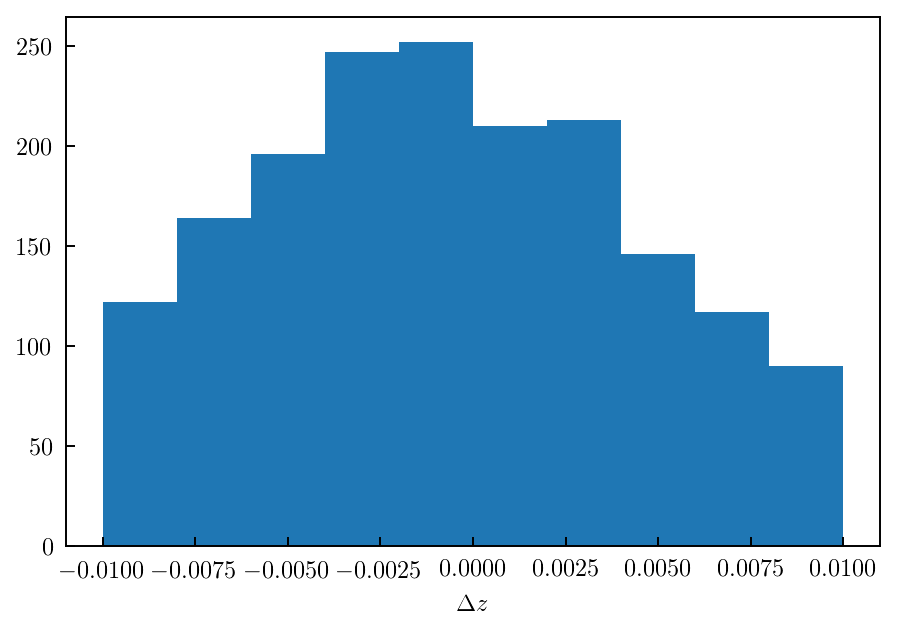

In [153]:
##To do, plot against all miscentered z difference. 
plt.hist(mismatched_z_diff, density=True, alpha=0.5, label='mismatched')
#plt.hist(BCG_miscent.Z - mat, density=True, alpha=0.5, label='All miscentered')
plt.xlabel(r'$\Delta z$')
plt.show()

<function matplotlib.pyplot.show>

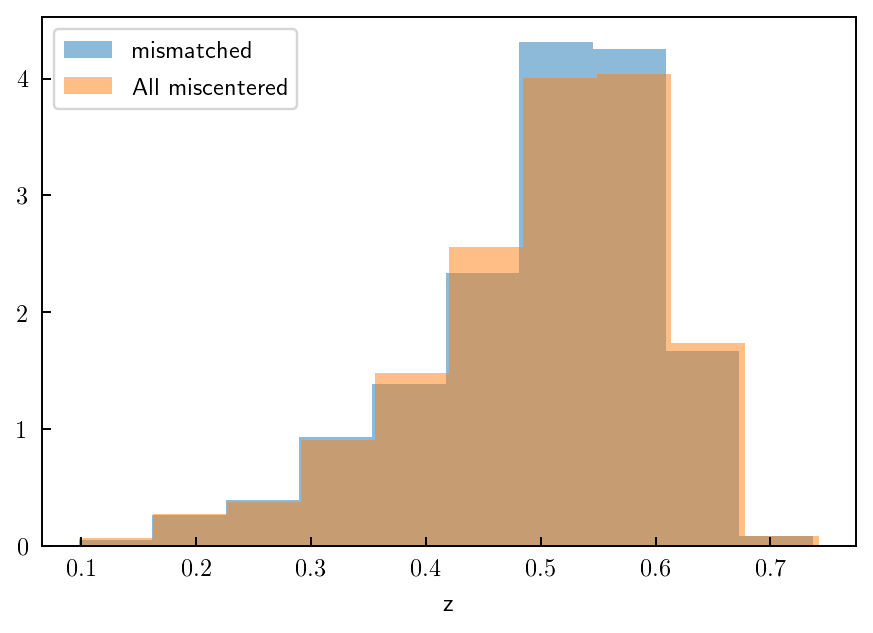

In [156]:
plt.hist(mismatched_z, bins=10, density=True, alpha=0.5, label='mismatched')
plt.hist(BCG_miscent.Z, bins=10, density=True, alpha=0.5, label='All miscentered')
plt.xlabel('z')
plt.legend()
plt.show